# <center> <font color='Purple' face='Cursive'>  Telecom Churn Analysis </b></center>

<b><font color = 'Maroon'><b>Background:</b></font> <br></b>
&emsp;In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again)

<font faces='Courier' color = 'red'><b>Problem Statement:</b></font>
Analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.<br><br>

<font faces='Courier' color = 'olive'><b>Business Objective:</b></font>
The dataset provided contains customer-level information for a span of four consecutive months - June, July, August and September.
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

### <font color='Bronze' face='Cursive'>  Now that we have understood what we are actually working on with the dataset. Let's go ahead and start analysing the data set for the same </font>

In [73]:
# Import Libraries necessary for Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Libraries for train-test split
from sklearn.model_selection import train_test_split

# Import Libraries for SMOTE
from imblearn.over_sampling import SMOTE 

# Import Libraries for Pre-processing steps of model Building
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
import scipy.stats as stats

from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Import Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import Libraries for metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import recall_score, accuracy_score

# Imports For Boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance


# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

 <font color="#1F45FC" face='Comic Sans MS'> Lets read the dataset provided and check whether the dataset has been read correctly</font>

In [74]:
# Import the dataset
telecom = pd.read_csv(r"telecom_churn_data.csv")

# Display top 5 rows of the dataframe
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [75]:
# Check Shape of the data set
telecom.shape

(99999, 226)

<font color="#1F45FC" face='Comic Sans MS'> We can see that there are 99999 rows and 226 columns in the data set. However we have no idea what this 226 columns represent. So let's import the data dictionary to check what each of these columns represent </font>

In [76]:
meta_data = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

In [77]:
meta_data

Acronyms                                           Descriptions
0   MOBILE_NUMBER                              Customer phone number
1       CIRCLE_ID  Telecom circle area to which the customer belo...
2             LOC           Local calls - within same telecom circle
3             STD             STD calls - outside the calling circle
4              IC                                     Incoming calls
5              OG                                     Outgoing calls
6             T2T  Operator T to T, i.e. within same operator (mo...
7         T2M                    Operator T to other operator mobile
8         T2O                Operator T to other operator fixed line
9         T2F                         Operator T to fixed lines of T
10        T2C                     Operator T to it’s own call center
11       ARPU                               Average revenue per user
12        MOU                         Minutes of usage - voice calls
13        AON      Age on network - number of days the customer i...
14       ONNET     All kind of calls within the same operator net...
15     OFFNET       All kind of calls outside the operator T network
16           ROAM  Indicates that customer is in roaming zone dur...
17         SPL                                         Special calls
18        ISD                                              ISD calls
19       RECH                                               Recharge
20        NUM                                                 Number
21        AMT                               Amount in local currency
22        MAX                                                Maximum
23       DATA                                        Mobile internet
24         3G                                             3G network
25         AV                                                Average
26        VOL                   Mobile internet usage volume (in MB)
27         2G                                             2G network
28        PCK                 Prepaid service schemes called - PACKS
29      NIGHT         Scheme to use during specific night hours only
30    MONTHLY      Service schemes with validity equivalent to a ...
31      SACHET     Service schemes with validity smaller than a m...
32        *.6                              KPI for the month of June
33        *.7                              KPI for the month of July
34        *.8                            KPI for the month of August
35        *.9                         KPI for the month of September
36        FB_USER  Service scheme to avail services of Facebook a...
37        VBC      Volume based cost - when no specific scheme is...

In [78]:
# Check Info
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [79]:
telecom.columns.tolist()

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

<font color="#254117" face='Verdana'> We imported the data set and also had a look at the columns in the data set. Now our next target to treat any missing values and outliers </font>

## <font color="Caramel" face='Cursive'> Data Cleaning Part-1</font>

<font color="#E55451" face='Comic Sans MS'> We will start with treating the columns having same data throughout. Once we are done with that we will move to next step which is missing value treatment</font>

In [80]:
# Find columns having same value in all rows
sam_val=[]
for col in telecom.columns:
    if(telecom[col].nunique()==1):
        sam_val.append(col)

        
print("There are",len(sam_val)," columns having same Values in all rows and they are:", sam_val)

There are 16  columns having same Values in all rows and they are: ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


<b><font color="#7D0552" face='Comic Sans MS'> The above columns have the values in all rows same. So they will not be of much help in the analysis. So dropping all those columns </font></b>

In [81]:
# Drop all the columns that have all values same
telecom_clean = telecom.drop(sam_val,axis=1)
telecom_clean.shape

(99999, 210)

<b><font color="#E3319D" face='Comic Sans MS'>We are done with removing columns having same values throughout the columns, so lets Check for Null Values in the data</font></b>

In [82]:
telecom_clean.columns[telecom_clean.isnull().any()].tolist()

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'std_og_mou_9',


<b><font color="#2B547E" face='Comic Sans MS'> Since there are so many columns having null values, it would be easier to treat these values once we get the required data for Analysis, instead of working on the whole data set. So lets first seggregate the High Value customers and then do cleaning on that data</font></b>

## <font color="#CA226B" face='Cursive'> Data Preparation Part-1</font>

<b><font color="Red" face='Comic Sans MS'> We have decided to segregate the High value customers, we should be knowing who could be considered as a high value customer. Lets see the business definition for a high value customer</font><br>
    
<font color="Olive" face='Comic Sans MS'>According to business,High-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).</font></b>

<b> <font color="#E238EC" face='Comic Sans MS'> Now that we understand who high value customers are. Let's try to make sure there is only one record for one customer. We can do this by verifying mobile number</font></b>

In [83]:
# Check whether the Mobile number is unique
telecom_clean.mobile_number.nunique()

99999

<b> <font color="#E238EC" face='Comic Sans MS'> Since number of unique values is equal to number of rows we have confirmed that each customer has only one record in data provided. Now we will try to segregate the data of high value customers. Here we are using total_rech_amt as the total amount of recharge for month which includes data as its prepaid</font></b>

<br>
<b> <font color="#8C001A" face='Comic Sans MS'> But we don't have features ready for the same, so let's derive a features which would help us on deciding on High Value Customers </font></b>
<br><br>
<b> <font color="Red" face='Comic Sans MS'> We need to calculate the amount spent on data recharge to account for total recharge amount which can be calculated by av_rech_amt_data_x * total_rech_data_x where x is 6,7,8,9

In [84]:
# Calculate amount spent on data recharge
telecom_clean['total_rech_data_amt_6'] = telecom_clean['av_rech_amt_data_6'] * telecom_clean['total_rech_data_6']
telecom_clean['total_rech_data_amt_7'] = telecom_clean['av_rech_amt_data_7'] * telecom_clean['total_rech_data_7']
telecom_clean['total_rech_data_amt_8'] = telecom_clean['av_rech_amt_data_8'] * telecom_clean['total_rech_data_8']
telecom_clean['total_rech_data_amt_9'] = telecom_clean['av_rech_amt_data_9'] * telecom_clean['total_rech_data_9']

<b> <font color="#B93B8F" face='Monospace'> Now lets go ahead and calculate the average recharge done in first two months(The Good Phase). The total amount would be sum of total recharge amounts and also amount recharged for data</font><br><br> <font color="Olive" face='Monospace'>It has to be noted that there is possibility of having null values  has few null values. Let's try to handle null values and find avg rechange in one go. 
   <br> We will be imputing null values of the columns by 0 as Null values here indicate customer did not use the service.</font></b>

In [85]:
# Impute null values by 0 and calculate average
telecom_clean['telecom_av_rech_good_phase'] = (telecom_clean['total_rech_amt_6'].fillna(0) 
+ telecom_clean['total_rech_amt_7'].fillna(0) + telecom_clean['total_rech_data_amt_6'].fillna(0) 
+ telecom_clean['total_rech_data_amt_7'].fillna(0) )/2

 <b><font color="#B93B8F" face='Monospace'> Here we have average of recharges in good phase. So our next step would be find High valued customers</font></b>

In [86]:
# Calculate 70% of average recharge amount in the first two months 
min_per_hv = np.percentile(telecom_clean['telecom_av_rech_good_phase'], 70.0)

min_per_hv

478.0

In [87]:
# Create a new dataset comprising only of high valued customers
telecom_hv = telecom_clean[telecom_clean['telecom_av_rech_good_phase'] >= min_per_hv]

telecom_hv.shape

(30001, 215)

<b><font color="#B93B8F" face='Monospace'> Lets drop telecom_av_rech_good_phase since we no longer need it </font></b>

In [88]:
# drop telecom_av_rech_good_phase
telecom_hv.drop(['telecom_av_rech_good_phase'],axis=1,inplace=True)

telecom_hv.shape

C:\Users\91967\anaconda3\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(30001, 214)

<b><font color="#7D1B7E" face='Consolas'> Now that we found out the High valued customers. We will derive our target variable which is whether customer churns or not</font></b>

<b><font color="Red" face='Comic Sans MS'> But Which Customers can be considered as Churned? </font>
<br>
<font color="#E238EC" face='Comic Sans MS'> According to Business, Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase </font>
<br>    
<font color="Olive" face='Comic Sans MS'> Now we know which customers are considered churn by Business.</font> <font color="Red" face='Comic Sans MS'>What can be considered as the churn phase?</font>
<br>
<font color="#E238EC" face='Comic Sans MS'>In this case, since We are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.</font></b>
<br><br>
<font color="#E3319D" face='Comic Sans MS'>Now lets define how we are going to findout churners, Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in 4th month of given data i.e., Sep are considered as churners </font></b>

<font color="Green" face='Comic Sans MS'>The attributes we need to use to tag churners are:
 - total_ic_mou_9
 - total_og_mou_9
 - vol_2g_mb_9
 - vol_3g_mb_9
 
If all these attributes are zero (0) then they can be tagged as churned

<font color="#614051" face='Comic Sans MS'>There might be a chance that there are null values. So lets fill up null values with 0 and at the same time create a new column which represents whether the customer has churned or not. First we assign a True or False in the column and later we will be making it 1 for churn and 0 for non churn </font>

In [89]:
# Find churn and non-churn
telecom_hv['Churn'] = (telecom_hv['total_ic_mou_9'].fillna(0)==0) & (telecom_hv['total_og_mou_9'].fillna(0)==0) & (telecom_hv['vol_2g_mb_9'].fillna(0)==0) & (telecom_hv['vol_3g_mb_9'].fillna(0)==0)

telecom_hv.shape

C:\Users\91967\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(30001, 215)

In [90]:
# Check values in telecom_hv['Churn']
telecom_hv['Churn'].head()

0      True
7      True
8     False
21    False
23    False
Name: Churn, dtype: bool

In [91]:
# Coverting churn info into 0's and 1's
telecom_hv['Churn'] = telecom_hv['Churn'].apply(lambda x: 1 if x==True else 0)

telecom_hv['Churn'].head()

C:\Users\91967\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0     1
7     1
8     0
21    0
23    0
Name: Churn, dtype: int64

## <font color="Caramel" face='Cursive'> Data Cleaning Part-2</font>

<font color="#B048B5" face='Comic Sans MS'> Now that we have found out churned Customers and created new column for churn. We should not be considering any data of last month in analysis because we are actually analysing for behaviour in last month. So if we consider a real time scenario we would not be having data of 9th month while executing. So we will remove all the data that is available on 9th month</font>

In [92]:
#Find all columns ending with 9 as they belong to Sept month
drop_cols = [col for col in telecom_hv if col[-1]=='9']
drop_cols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'total_rech_data_amt_9']

In [93]:
# Remove this list of columns above
telecom_hv.drop(drop_cols,axis=1,inplace=True)

# Check Shape
telecom_hv.shape

C:\Users\91967\anaconda3\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(30001, 163)

<font color="#7F38EC" face='Comic Sans MS'> We know that there are so many missing values in the data, So its our priority to make sure there are no nulls or missing values.</font><br>

In [94]:
# Check Info
telecom_hv.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 163 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             30001 non-null  int64  
 1   arpu_6                    30001 non-null  float64
 2   arpu_7                    30001 non-null  float64
 3   arpu_8                    30001 non-null  float64
 4   onnet_mou_6               29456 non-null  float64
 5   onnet_mou_7               29464 non-null  float64
 6   onnet_mou_8               28827 non-null  float64
 7   offnet_mou_6              29456 non-null  float64
 8   offnet_mou_7              29464 non-null  float64
 9   offnet_mou_8              28827 non-null  float64
 10  roam_ic_mou_6             29456 non-null  float64
 11  roam_ic_mou_7             29464 non-null  float64
 12  roam_ic_mou_8             28827 non-null  float64
 13  roam_og_mou_6             29456 non-null  float64
 14  roam_

<font color='#E67451' faces = 'Open Sans'>On Checking Info there is one more col sep_vbc_3g which relates to september month. So that's not required. Dropping that</font>

In [95]:
# Drop sep_vbc_3g
telecom_hv.drop('sep_vbc_3g',axis=1,inplace=True)

In [96]:
# Check Null values in dataframe
telecom_hv.columns[telecom_hv.isnull().any()].tolist()

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

<font color="#7F38EC" face='Comic Sans MS'> We have now seen the columns having null values. Out of those there are below mentioned date columns.
 - date_of_last_rech_6
 - date_of_last_rech_7
 - date_of_last_rech_8
 - date_of_last_rech_data_6
 - date_of_last_rech_data_7
 - date_of_last_rech_data_8 </font>
 
 <font color="#E4287C" face='Comic Sans MS'> Our unserstanding about telecom domain is that the amount the customers reccharged is more important than date of recharge, as there are chances that a customer very well aware of his usage and recharges at the start of the month and some others might might prefer small recharges through out the month, so dates are of less significance in this context. So lets drop those columns</font>

In [97]:
# Drop Unrequired Columns
telecom_hv.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8',],axis=1,inplace=True)

# Check shape
telecom_hv.shape

(30001, 156)

In [98]:
# Check Null values in dataframe
telecom_hv.columns[telecom_hv.isnull().any()].tolist()

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

 <font color="#9F000F" face='Comic Sans MS'> All the above null value columns might be null because the user hasn't used that particular service. So they can be replaced by 0 </font>

In [99]:
# Fill Null Values with 0
telecom_hv[telecom_hv.columns[telecom_hv.isnull().any()].tolist()]=telecom_hv[telecom_hv.columns[telecom_hv.isnull().any()].tolist()].fillna(0)

# Check for null values
telecom_hv.columns[telecom_hv.isnull().any()].tolist()

C:\Users\91967\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


[]

<font color="#151B54" face='Comic Sans MS'> Let's check if there is some relationship between total reacharge data and sachet data</font>

In [100]:
# Checking if the sum of count_rech_2g and count_rech_3g matches with that of total_rech_data

print("For month 6")
print(telecom_hv[telecom_hv.monthly_2g_6+ telecom_hv.sachet_2g_6 + telecom_hv.monthly_3g_6 + telecom_hv.sachet_3g_6 != telecom_hv.total_rech_data_6].shape)

print("For month 7")
print(telecom_hv[telecom_hv.monthly_2g_7+ telecom_hv.sachet_2g_7 + telecom_hv.monthly_3g_7 + telecom_hv.sachet_3g_7 != telecom_hv.total_rech_data_7].shape)

print("For month 8")
print(telecom_hv[telecom_hv.monthly_2g_8 + telecom_hv.sachet_2g_8 + telecom_hv.monthly_3g_8 + telecom_hv.sachet_3g_8 != telecom_hv.total_rech_data_8].shape)

For month 6
(0, 156)
For month 7
(0, 156)
For month 8
(0, 156)


<font color="#151B54" face='Comic Sans MS'> Since all the values are same we can go ahead and drop those columns. Also we are accounting for a new feature based on av_rech_amt_data_x &  total_rech_data_x. So drop those as well 

In [101]:
cols_drop =['monthly_2g_6','monthly_3g_6','sachet_3g_6','monthly_2g_6','monthly_2g_7','monthly_3g_7','sachet_3g_7',
            'monthly_2g_7','monthly_2g_8','monthly_3g_8','sachet_3g_8','monthly_2g_8',
            'av_rech_amt_data_6','total_rech_data_6','av_rech_amt_data_7','total_rech_data_7',
            'av_rech_amt_data_8','total_rech_data_8','sachet_2g_7','sachet_2g_6','sachet_2g_8']
telecom_hv.drop(cols_drop,axis=1,inplace=True)

telecom_hv.shape

C:\Users\91967\anaconda3\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(30001, 138)

<font color="#C85A17" face='Comic Sans MS'> Final Check if there any columns that have the same value </font>

In [102]:
# Find columns having same value in all rows
sam_val=[]
for col in telecom_hv.columns:
    if(telecom_hv[col].nunique()==1):
        sam_val.append(col)

        
print("There are",len(sam_val)," columns having same Values in all rows and they are:", sam_val)

There are 0  columns having same Values in all rows and they are: []


<font color="#7E3817" face='Comic Sans MS'> Now as we are done with total cleaning process. But we have too many features to analyse on.Lets go ahead and dervie new features so that we could minimise dataset to maximum extent possible</font>

In [103]:
#Check Info so that we could get an idea on what features are to be worked on
telecom_hv.info(max_cols=160)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 138 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mobile_number          30001 non-null  int64  
 1   arpu_6                 30001 non-null  float64
 2   arpu_7                 30001 non-null  float64
 3   arpu_8                 30001 non-null  float64
 4   onnet_mou_6            30001 non-null  float64
 5   onnet_mou_7            30001 non-null  float64
 6   onnet_mou_8            30001 non-null  float64
 7   offnet_mou_6           30001 non-null  float64
 8   offnet_mou_7           30001 non-null  float64
 9   offnet_mou_8           30001 non-null  float64
 10  roam_ic_mou_6          30001 non-null  float64
 11  roam_ic_mou_7          30001 non-null  float64
 12  roam_ic_mou_8          30001 non-null  float64
 13  roam_og_mou_6          30001 non-null  float64
 14  roam_og_mou_7          30001 non-null  float64
 15  r

<font color="#4E8975" face='Comic Sans MS'> Since we considered months 6 and 7 as 'good' phase and there would be change in behaviour of customer mostly in 'action' phase i.e., 8th month, so lets not data in 6 and 7 as two different columns and instead use a single column for the same by taking average of values</font>

In [104]:
# Find columns having same name except suffix
av_cols = telecom_hv.filter(regex='_6|_7',axis=1).columns.str[:-2].unique()

av_cols

Index(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou',
       'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou',
       'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou',
       'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou',
       'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou',
       'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt',
       'max_rech_data', 'count_rech_2g', 'count_rech_3g', 'vol_2g_mb',
       'vol_3g_mb', 'arpu_3g', 'arpu_2g', 'night_pck_user', 'fb_user',
       'total_rech_data_amt'],
      dtype='object')

<font color="Red" face='Comic Sans MS'> Out of the av_cols obtained fb_user , sachet_3g,sachet_2g,monthly_3g,monthly_2g,night_pck_user are Categorical, Hence we won't be doing any operations on them. So removing those columns from list before performing operations.</font>

In [105]:
# lets take the average now
for col in av_cols.unique():
    if col not in ('fb_user','sachet_3g','sachet_2g','monthly_3g','monthly_2g','night_pck_user'):
        avg_col_name = "avg_"+col+"_6n7" # lets create the column name dynamically
        col_6 = col+"_6"
        col_7 = col+"_7"
        telecom_hv[avg_col_name] = ((telecom_hv[col_6]  + telecom_hv[col_7])/ 2)
        # Since we no longer need those columns lets drop them
        telecom_hv.drop([col_6,col_7],axis=1,inplace=True)
telecom_hv.shape

C:\Users\91967\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


(30001, 96)

<font color="#157DEC" face='Comic Sans MS'> We also have two more columns which are defined differently for months 6 and 7.
 - jun_vbc_3g
 - jul_vbc_3g 
<br>
we will get average of them and drop them

In [106]:
# Calculate Avg of columns mentioned above
telecom_hv['avg_vbc_3g'] = ((telecom_hv['jun_vbc_3g']  + telecom_hv['jul_vbc_3g'])/ 2)

#Drop the above mentioned columns
telecom_hv.drop(['jun_vbc_3g','jul_vbc_3g'],axis=1,inplace=True)

#Check Shape
telecom_hv.shape

C:\Users\91967\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(30001, 95)

In [107]:
# Check Info
telecom_hv.info(max_cols=102)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 95 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   mobile_number                30001 non-null  int64  
 1   arpu_8                       30001 non-null  float64
 2   onnet_mou_8                  30001 non-null  float64
 3   offnet_mou_8                 30001 non-null  float64
 4   roam_ic_mou_8                30001 non-null  float64
 5   roam_og_mou_8                30001 non-null  float64
 6   loc_og_t2t_mou_8             30001 non-null  float64
 7   loc_og_t2m_mou_8             30001 non-null  float64
 8   loc_og_t2f_mou_8             30001 non-null  float64
 9   loc_og_t2c_mou_8             30001 non-null  float64
 10  loc_og_mou_8                 30001 non-null  float64
 11  std_og_t2t_mou_8             30001 non-null  float64
 12  std_og_t2m_mou_8             30001 non-null  float64
 13  std_og_t2f_mou_8

<font color="#7D0541" face='Comic Sans MS'> Also the mobile number column has all rows different. This can be used when we areb working on a single customer to identify his needs but when we are working on identifying predictors of the Churn, we don't think it would be necessary to have mobile number column. So dropping that</font>

In [108]:
# Drop mobile_number
telecom_hv.drop('mobile_number',axis=1,inplace=True)

# Check Shape
telecom_hv.shape

(30001, 94)

<b><font color="#348781" face='Comic Sans MS'> Now we have arrived at the best features possible. Now let's go ahead and do some data analysis</font></b>

## <font color='F433FF' face='Cursive'> Data Analysis </font>

<font color="Crimson" face='Comic Sans MS'> We assume that Age on network , recharge amount and Average revenue generated might be the deciding factors for Churn So analysing those </font>

In [109]:
# Find stats for the arpu
telecom_hv[['avg_arpu_6n7','arpu_8']].describe()

avg_arpu_6n7        arpu_8
count  30001.000000  30001.000000
mean     559.636514    508.597957
std      429.909145    501.961981
min     -749.783000   -945.808000
25%      345.289000    231.473000
50%      484.859500    427.585000
75%      674.571000    661.491000
max    31438.461000  33543.624000

<font color='Red' face='Comic Sans MS'>It is also evident that there are a few outliers since mean and median and way apart.This might ver well effect our predictions. So let's remove outliers from our data.</font><br>
<b><font color='Brown' face='Comic Sans MS'> We will be using Z-score to remove the outliers</font></b>

In [110]:
# Remove outliers 
z_score_arpu_6n7 = (telecom_hv.avg_arpu_6n7 - telecom_hv.avg_arpu_6n7.mean())/telecom_hv.avg_arpu_6n7.std()
z_score_arpu_8 = (telecom_hv.arpu_8 - telecom_hv.arpu_8.mean())/telecom_hv.arpu_8.std()
telecom_hv = telecom_hv[(z_score_arpu_6n7<3) &  (z_score_arpu_6n7>-3) & (z_score_arpu_8<3) &  (z_score_arpu_8>-3)]

telecom_hv.shape

(29535, 94)

In [111]:
# Find stats for the recharge amount
telecom_hv[['avg_total_rech_amt_6n7','total_rech_amt_8']].describe()

avg_total_rech_amt_6n7  total_rech_amt_8
count            29535.000000      29535.000000
mean               629.345996        551.094295
std                344.913271        428.547396
min                  0.000000          0.000000
25%                404.750000        250.000000
50%                564.500000        483.000000
75%                780.000000        757.000000
max               3299.000000       6698.000000

<font color='Red' face='Comic Sans MS'>It is also evident that there are  outliers here as well since mean and median and way apart.This might ver well effect our predictions since we plan to use boosting if in any case we get less accuracy. So let's remove outliers from our data.</font><br>
<b><font color='Brown' face='Comic Sans MS'> We will be using Z-score to remove the outliers</font></b>

In [112]:
# Remove outliers 
z_score_avg_total_rech_amt_6n7 = (telecom_hv.avg_total_rech_amt_6n7 - telecom_hv.avg_total_rech_amt_6n7.mean())/telecom_hv.avg_total_rech_amt_6n7.std()
z_score_total_rech_amt_8 = (telecom_hv.total_rech_amt_8 - telecom_hv.total_rech_amt_8.mean())/telecom_hv.total_rech_amt_8.std()
telecom_hv = telecom_hv[(z_score_avg_total_rech_amt_6n7<3) &  (z_score_avg_total_rech_amt_6n7>-3) & (z_score_total_rech_amt_8<3) &  (z_score_total_rech_amt_8>-3)]

telecom_hv.shape

(28755, 94)

<font color='neon' face='Comic Sans MS'> Lets Check box plots to check whether outliers are removed</font>

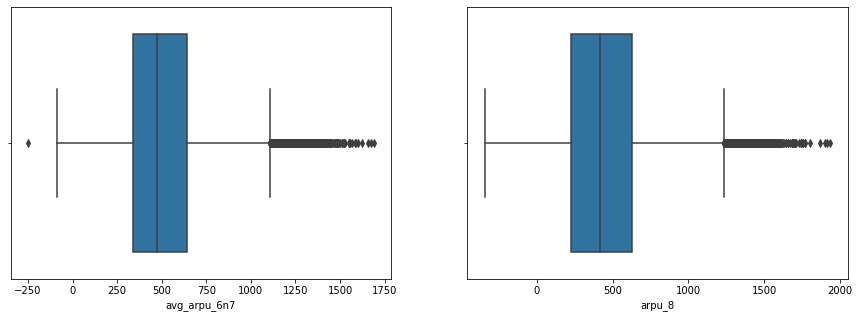

In [113]:
# Check boxplots of arpu for 6n7
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(telecom_hv.avg_arpu_6n7)   

# Check boxplot of arpu for 8
plt.subplot(1,2,2)
sns.boxplot(telecom_hv.arpu_8)  

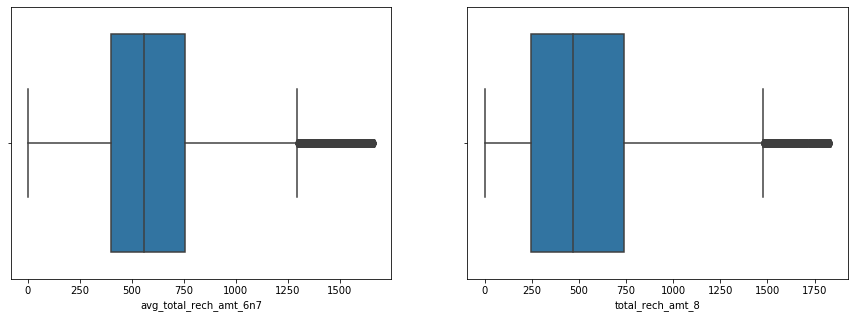

In [114]:
# Check box plots of recharge amount for 6n7
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(telecom_hv.avg_total_rech_amt_6n7)   

# Check box plots of recharge amoun 8
plt.subplot(1,2,2)
sns.boxplot(telecom_hv.total_rech_amt_8)  

<font color='Magenta' face='Comic Sans MS'>Now that the box plots seems to be good enough  and outliers are removed lets go for further analysis</font><br>

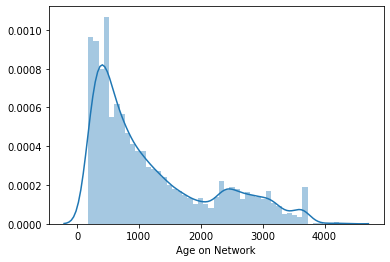

In [115]:
# Lets Check distribution plot and box plot for Age on network - number of days the customer is using the operator T network
sns.distplot(telecom_hv.aon)
plt.xlabel("Age on Network")
plt.show()

<font color='Green' face='Comic Sans MS'><b>Observations:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - There are more high value customers when the Age of the customer on network is less. 
 - With increasing Age the number of high value customers seems to be decreasing with a slight increase after 2000 days.
</font>
 
<font color='Green' face='Comic Sans MS'><b>Analysis:</b></font>
<font color='Blue' face='Comic Sans MS'>
  - The possible reason could be that the provider has been providing more number of benifits during early stage to attract more customers.
  - There might be change in policies that apply with every passing year/month making things difficult for customers.
 </font>

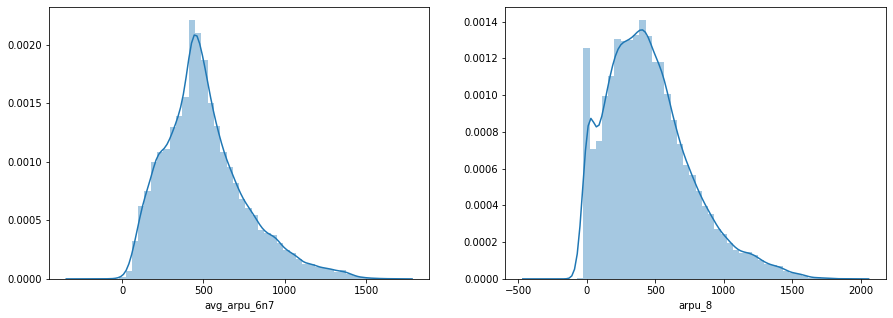

In [116]:
# Check distribution of arpu for 6n7
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(telecom_hv.avg_arpu_6n7)   

# Check distribution of arpu for 8
plt.subplot(1,2,2)
sns.distplot(telecom_hv.arpu_8) 

plt.show()

<font color='Green' face='Comic Sans MS'><b>Observations:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - The shape graphs seems to be also similar to except for the fact the number of customers generating 0 revenue has increased which effected the magnitudes.
 - There is decrease in the number of customers who give high revenue. 
</font>
 
<font color='Green' face='Comic Sans MS'><b>Analysis:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - Some customers who are generating low revenue previously would have generated less revenue and those generated less might have generated more revenue.
 - The increase in customers generating revenue of 0 indicates that more people have stopped generating more revenue.
 - The people generating more revenue than good phase might be the people who are impressed with the services.
 - While the Ones that have generated low income revenue might very well be people who found the services not upto the mark and might most likely Churn.
 </font>

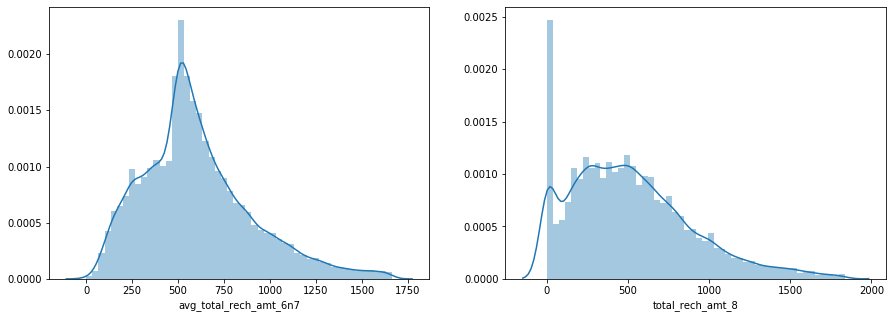

In [117]:
# Check distribution for rech_amt
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(telecom_hv['avg_total_rech_amt_6n7'])

plt.subplot(1,2,2)
sns.distplot(telecom_hv['total_rech_amt_8'])

plt.show()

<font color='Green' face='Comic Sans MS'><b>Observations:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - The shape graphs seems to be also similar to except for the fact the number of customers generating 0 revenue has increased which effected the magnitudes.
 - There is decrease in the number of customers who are recharging significant amount.
</font>
 
<font color='Green' face='Comic Sans MS'><b>Analysis:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - The customers who stopped recharging amount as compared to previous month might be the people who are most likely to churn.
 </font>

<font color="#7F5A58" face='Comic Sans MS'> Let us see effect of revenue on Churn and how few other features are related</font>

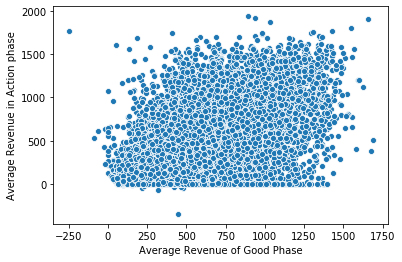

In [118]:
# avg_arpu_6n7 vs arpu_8
sns.scatterplot(telecom_hv['avg_arpu_6n7'],telecom_hv['arpu_8'])
plt.xlabel("Average Revenue of Good Phase")
plt.ylabel("Average Revenue in Action phase")
plt.show()

<font color='Green' face='Comic Sans MS'><b>Observations:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - There is no particular pattern that is being followed.
 - There are customers whose average revenue generated has decreased from Good Phase which is evident from the plot
</font>
 
<font color='Green' face='Comic Sans MS'><b>Analysis:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - The people whose revenue decreased from previous month have a possibility of Churn.
 - We see several customers have high drop in average revenue generated. These customers have high probability of Churning
</font>

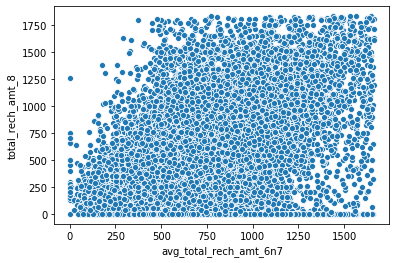

In [119]:
# Churn vs chg_total_rech 
sns.scatterplot(telecom_hv['avg_total_rech_amt_6n7'],telecom_hv['total_rech_amt_8'])
plt.show()

<font color='Green' face='Comic Sans MS'><b>Observations:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - There is no particular pattern that is being followed.
 - There are customers whose Recharged quite a less amount as compared to previous month also there are people who recharged more
</font>
 
<font color='Green' face='Comic Sans MS'><b>Analysis:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - The people whose recharge amount increased from good phase are people who are satisfied and might continue using services and might very well bring in new customers.
 - The people whose recharge amount decreased are most likely to Churn and might probably had better understanding of services probably decreased the amount of rechargs
</font>

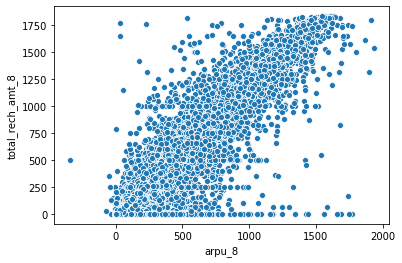

In [120]:
# chg_arpu vs chg_total_rech 
sns.scatterplot(telecom_hv['arpu_8'],telecom_hv['total_rech_amt_8'])
plt.show()

<font color='Green' face='Comic Sans MS'><b>Observations:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - There seems to be a some linear relationship between the two attributes.
 - Having said that it is very clear that as total recharge amount increases the revenue generated also increases in most of the cases but there are cases where Revenue is increases even when total recharge amount is less.

<font color='Green' face='Comic Sans MS'><b>Analysis:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - The cases where Revenue is more even when recharge amount is less might be due to the fact that even data recharge also contributes in total revenue.

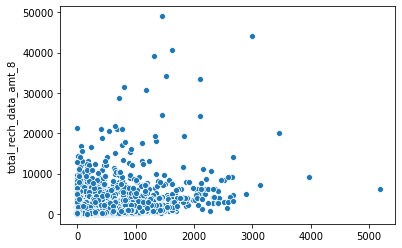

In [121]:
# chg_arpu_2g and 3g vs chg_total_rech _data
sns.scatterplot(telecom_hv['arpu_2g_8']+telecom_hv['arpu_3g_8'],telecom_hv['total_rech_data_amt_8'])
plt.show()

<font color='Green' face='Comic Sans MS'><b>Observations:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - We can't say there is a clear relationship in revenue generated.

<font color='Green' face='Comic Sans MS'><b>Analysis:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - This might particulary be due to the reason that few people take advantage of plans and use the data to the maximum extent causing no revenue and others might no be doing the same and very rarely use data services in such a case there will be profit for the company.

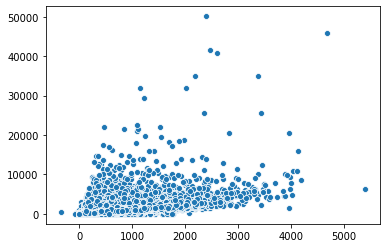

In [122]:
# Change in total revenue vs Change in total recharge
sns.scatterplot(telecom_hv['arpu_8']+telecom_hv['arpu_2g_8']+telecom_hv['arpu_3g_8'],telecom_hv['total_rech_amt_8']+telecom_hv['total_rech_data_amt_8'])
plt.show()

<font color='Green' face='Comic Sans MS'><b>Observations:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - The graph isn't following any particular trend and is very difficult to identify what sort of relationship they have

<b><font color='#7F5217' face='Comic Sans MS'>Now that we have done some analysis on variables we think might effect Churn. We will try to see how well these are related using heatmap</font></b>

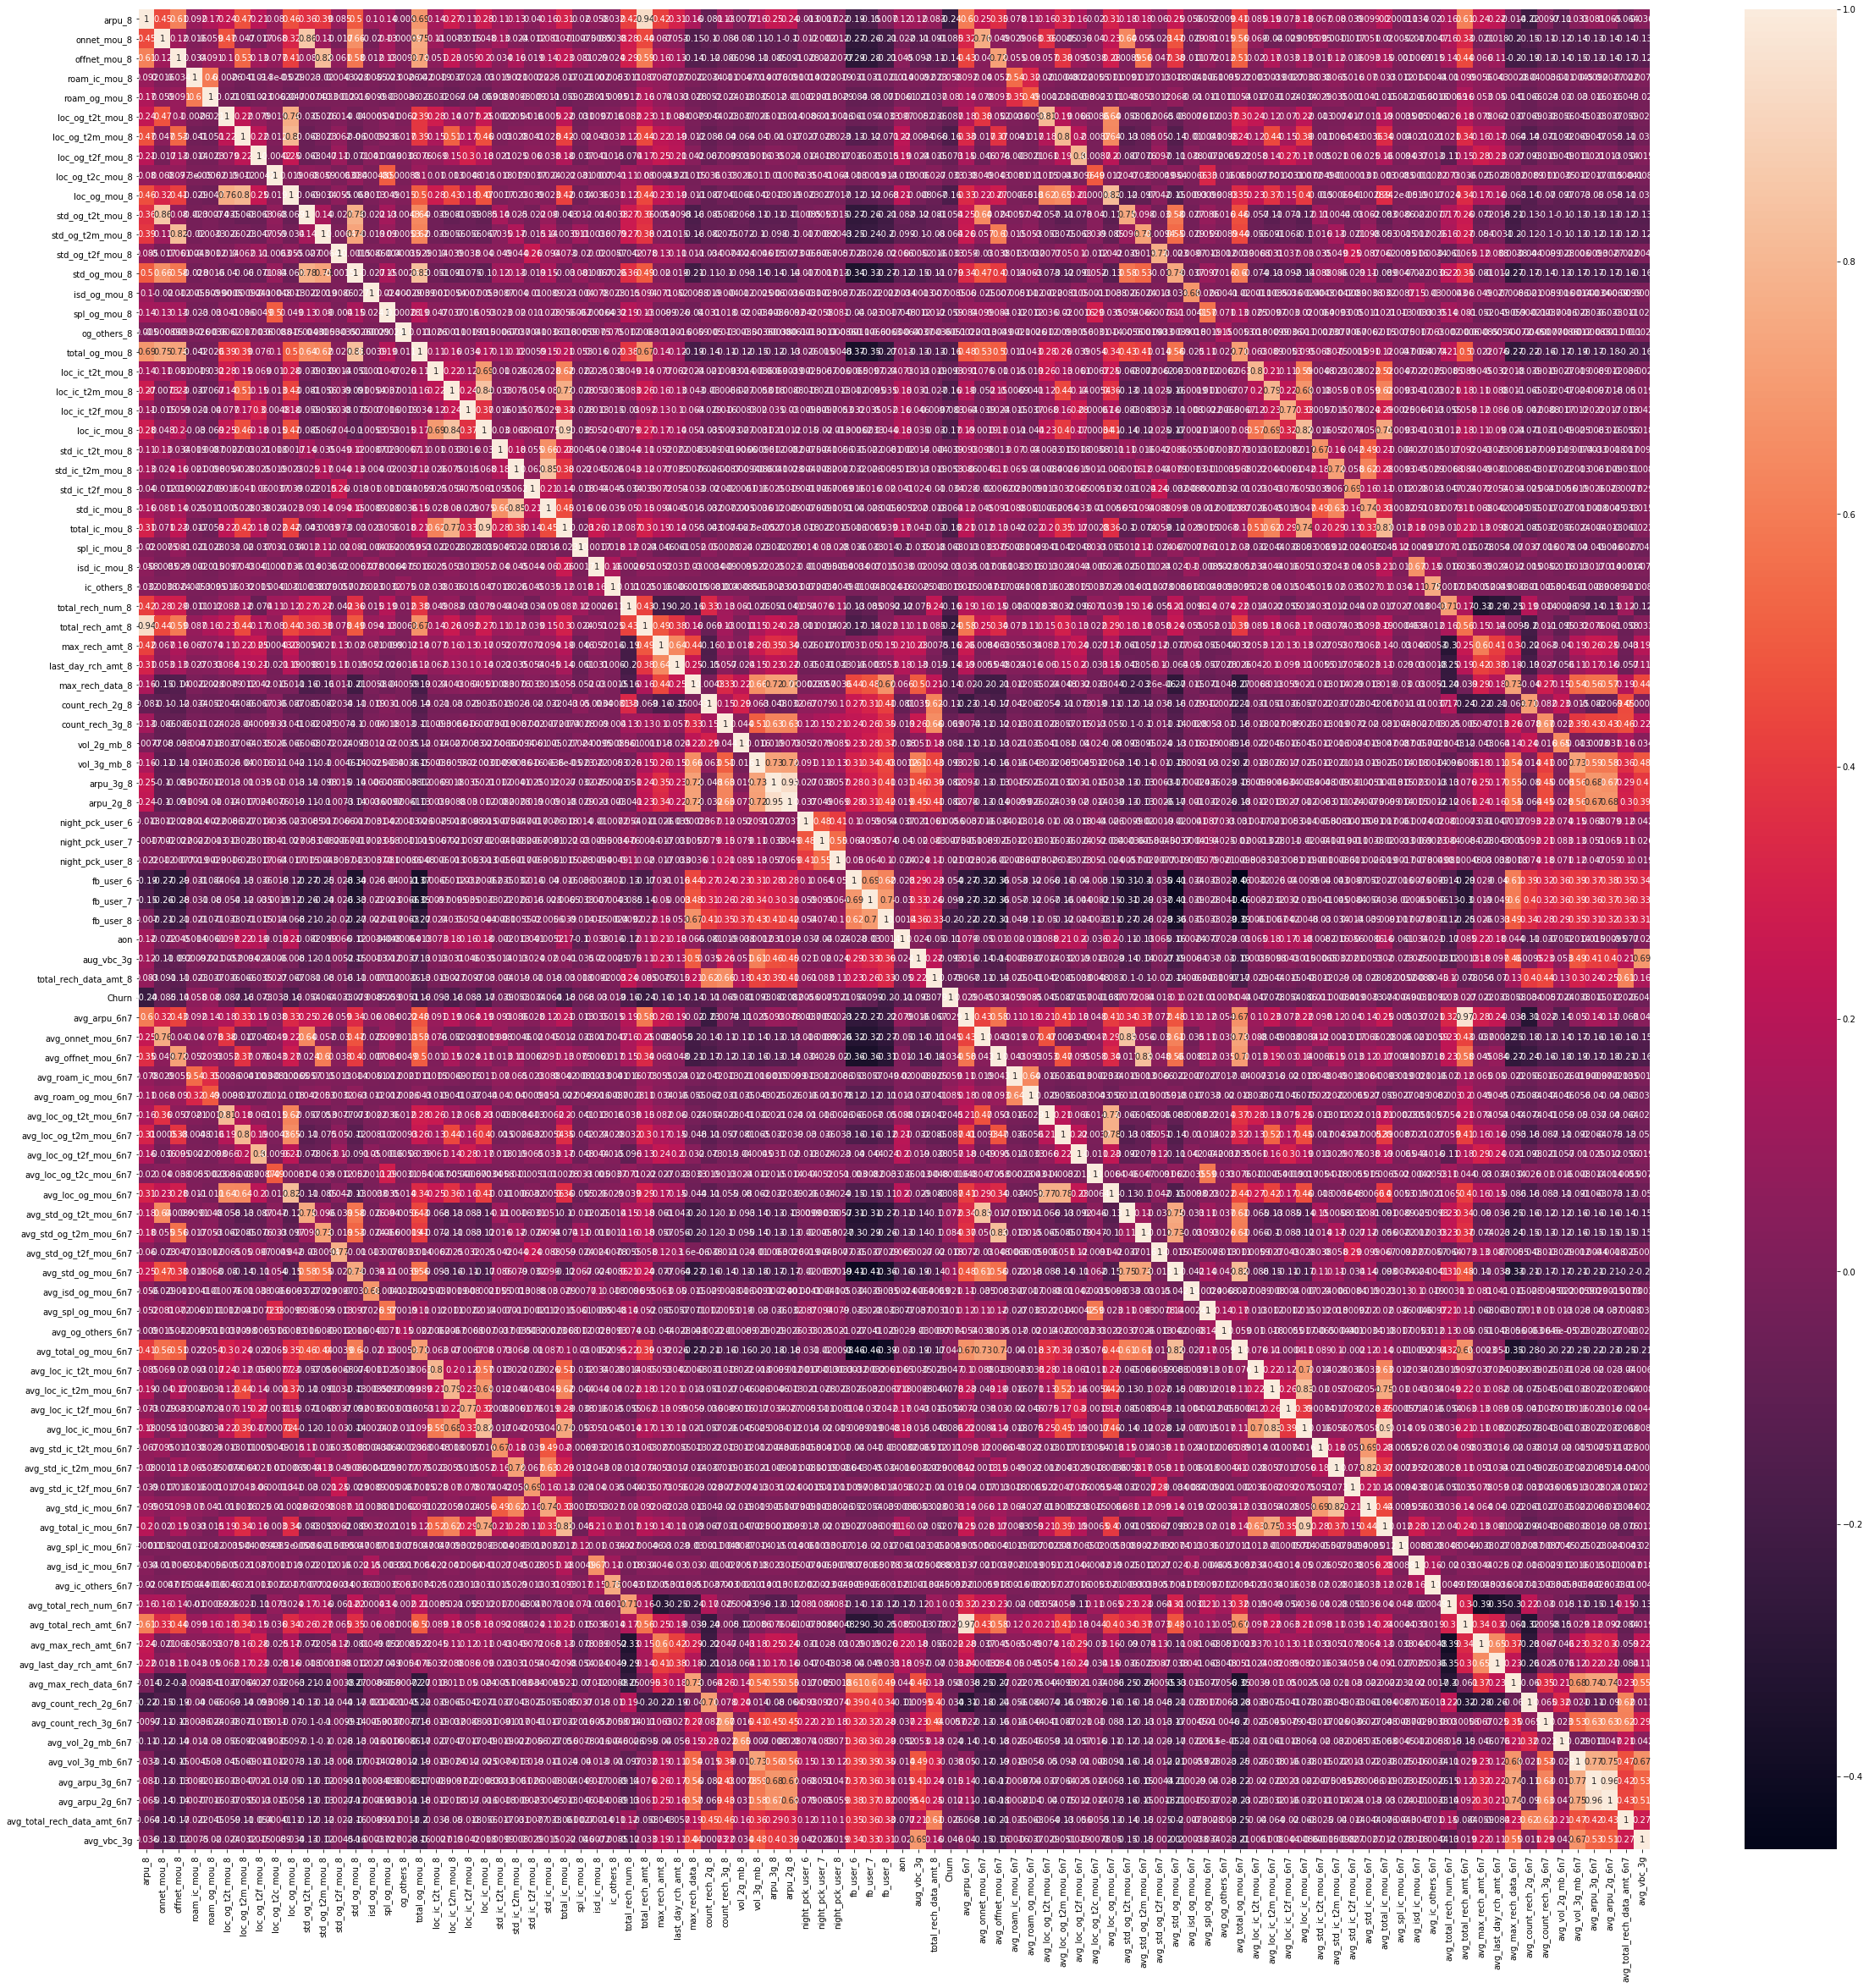

In [123]:
#Check correlations
plt.figure(figsize=(40,40))
sns.heatmap(telecom_hv.corr(),annot=True)
plt.show()

<font color='Red' face='Comic Sans MS'> Even though we cannot clearly see the values, It can be understood from color coding that there are quite a high number of parameters which are highly correlated.</font><br>

<font color='#2B65EC' face='Comic Sans MS'> We will not be doing any operations as of now for removing that as we would be using PCA for creating few models which would handle this multicollinearity </font>

In [124]:
# Churn %age
telecom_hv.Churn.value_counts(normalize=True)*100

0    91.91445
1     8.08555
Name: Churn, dtype: float64

<font color='#357EC7' face='Comic Sans MS'> We have churn percentage of about 8% in high value customers, which we think is very less for analysis provided the rows are just 30000. So we have go for Imbalance Treatment</font>

<b><font color='#348781' face='Comic Sans MS'> SMOTE does oversampling of minority data and thus making data Balanced. However, when it comes to real time scenario, the data we get might still have only limited number of Churn cases. So we apply SMOTE only after train-test Split</font></b>

## <font color='59E817' face='Cursive'> Train Test Split</font>

<font color=' dark pink' face='Comic Sans MS'> Before we split the data lets identify the target variable and categorical variables that we might need to create dummies for</font>

In [125]:
# Check info
telecom_hv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28755 entries, 0 to 99997
Data columns (total 94 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   arpu_8                       28755 non-null  float64
 1   onnet_mou_8                  28755 non-null  float64
 2   offnet_mou_8                 28755 non-null  float64
 3   roam_ic_mou_8                28755 non-null  float64
 4   roam_og_mou_8                28755 non-null  float64
 5   loc_og_t2t_mou_8             28755 non-null  float64
 6   loc_og_t2m_mou_8             28755 non-null  float64
 7   loc_og_t2f_mou_8             28755 non-null  float64
 8   loc_og_t2c_mou_8             28755 non-null  float64
 9   loc_og_mou_8                 28755 non-null  float64
 10  std_og_t2t_mou_8             28755 non-null  float64
 11  std_og_t2m_mou_8             28755 non-null  float64
 12  std_og_t2f_mou_8             28755 non-null  float64
 13  std_og_mou_8    

<b><font color='#FF8040' face='Comic Sans MS'> Target Variable is : Churn </font><br></b>
<font color='#F75D59' face='Comic Sans MS'> Categorical variables are : 
 1. night_pck_user_6         
 2. night_pck_user_7         
 3. night_pck_user_8         
 4. fb_user_6               
 5. fb_user_7               
 6. fb_user_8  </font>
 
<font color='#C24641' face='Comic Sans MS'> Lets Check what values they have and whther we need to create dummies for them </font>

In [126]:
for col in ['night_pck_user_6','fb_user_7','night_pck_user_7','fb_user_8','night_pck_user_8','fb_user_6']:
    print (telecom_hv[col].value_counts())

0.0    28372
1.0      383
Name: night_pck_user_6, dtype: int64
1.0    15131
0.0    13624
Name: fb_user_7, dtype: int64
0.0    28403
1.0      352
Name: night_pck_user_7, dtype: int64
0.0    15041
1.0    13714
Name: fb_user_8, dtype: int64
0.0    28442
1.0      313
Name: night_pck_user_8, dtype: int64
1.0    14960
0.0    13795
Name: fb_user_6, dtype: int64


<font color='#C24641' face='Comic Sans MS'> All the categorical variables have only two values 0 and 1 so we need not create any dummy variables. Now moving forward to splitting</font>

In [127]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

#Split train and test sets
telecom_hv_train, telecom_hv_test = train_test_split(telecom_hv, train_size = 0.7, stratify=telecom_hv['Churn'], random_state = 100)

In [128]:
# Check shapes of train and test sets
print(telecom_hv_train.shape)

print(telecom_hv_test.shape)

(20128, 94)
(8627, 94)


<font color='#B048B5' face='Comic Sans MS'> Now that we are done with train test split lets move to SMOTE for OverSampling of minority value in imbalanced datset</font>

<font color='Red' face='Comic Sans MS'>Before we proceed any further we better seperate our Independent and dependent Variables </font>

In [129]:
# Split train set
y_train = telecom_hv_train.pop('Churn')
X_train = telecom_hv_train

# Check shapes
print(y_train.shape)
print(X_train.shape)

(20128,)
(20128, 93)


In [130]:
# Split test set
y_test = telecom_hv_test.pop('Churn')
X_test = telecom_hv_test

# Check shapes
print(y_test.shape)
print(X_test.shape)

(8627,)
(8627, 93)


## <font color='#E45E9D' face='Cursive'>1. Logistic Regression </font>

### <font color='#E238EC' face='Cursive'>Feature Scaling </font>
<font color='#E55B3C' face='Cursive'> Since we are using logistice Regression, we have to perform scaling to bring all the features on to same scale failing which we might end up getting error data</font>

In [131]:
# Performing Scaling using Standard Scaler
scaler = StandardScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

X_train.head()

C:\Users\91967\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\91967\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
88114 -1.456138    -0.539122     -0.779033      -0.162739      -0.225946   
79149  2.558881     2.433046      4.857506      -0.162739      -0.225946   
56720  0.714864     1.690804     -0.348507      -0.162739      -0.225946   
50083  0.426538    -0.481163      0.525095      -0.162739      -0.225946   
11120  2.071042    -0.284577      0.804934       3.430045       2.960426   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
88114         -0.361772         -0.675270         -0.310837         -0.231068   
79149         -0.302382         -0.584478         -0.042803         -0.231068   
56720         -0.036299         -0.013886         -0.297886         -0.231068   
50083         -0.247687          1.736530         -0.310837         -0.231068   
11120         -0.356877         -0.367110          0.359811         -0.231068   

       loc_og_mou_8  ...  avg_last_day_rch_amt_6n7  avg_max_rech_data_6n7  \
88114     -0.679649  ...                 -0.185001               0.002238   
79149     -0.569168  ...                  0.157815              -0.790334   
56720     -0.047831  ...                 -0.600536              -0.790334   
50083      0.957748  ...                 -0.600536               1.247708   
11120     -0.439584  ...                  3.170443              -0.790334   

       avg_count_rech_2g_6n7  avg_count_rech_3g_6n7  avg_vol_2g_mb_6n7  \
88114               0.470980              -0.400212          -0.426984   
79149              -0.556962              -0.400212          -0.431123   
56720              -0.556962              -0.400212          -0.431123   
50083               0.059803              -0.400212           1.438517   
11120              -0.556962              -0.400212          -0.431123   

       avg_vol_3g_mb_6n7  avg_arpu_3g_6n7  avg_arpu_2g_6n7  \
88114           0.296714        -0.449257        -0.469297   
79149          -0.459912        -0.449257        -0.469297   
56720          -0.459912        -0.449257        -0.469297   
50083           2.008061        -0.388744        -0.469297   
11120          -0.459912        -0.449257        -0.469297   

       avg_total_rech_data_amt_6n7  avg_vbc_3g  
88114                     0.168907   -0.409687  
79149                    -0.452022   -0.443438  
56720                    -0.452022   -0.443438  
50083                    -0.144980    2.959248  
11120                    -0.452022   -0.443438  

[5 rows x 93 columns]

In [132]:
# Transform Test set as well
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

C:\Users\91967\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\91967\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


<font color='Orange' face='Comic Sans MS'> Now that we are done with Scaling lets move to further steps</font>

### <font color='#E238EC' face='Cursive'> Principal Component Analysis </font>
<font color='#E78A61' face='Comic Sans MS'>As Already discussed, Our data has so many Features which are correlated,So we perform to Remove all those correlations to maximum extent possible</font>

In [133]:
# Declare PCA and get features which would explain 95% variance
telecom_pca = PCA(0.95)

# fit PCA train set
X_train_pca = telecom_pca.fit_transform(X_train)

# Check shape 
X_train_pca.shape

(20128, 50)

<font color='#E78A61' face='Comic Sans MS'>Lets Check the correlations Now</font>

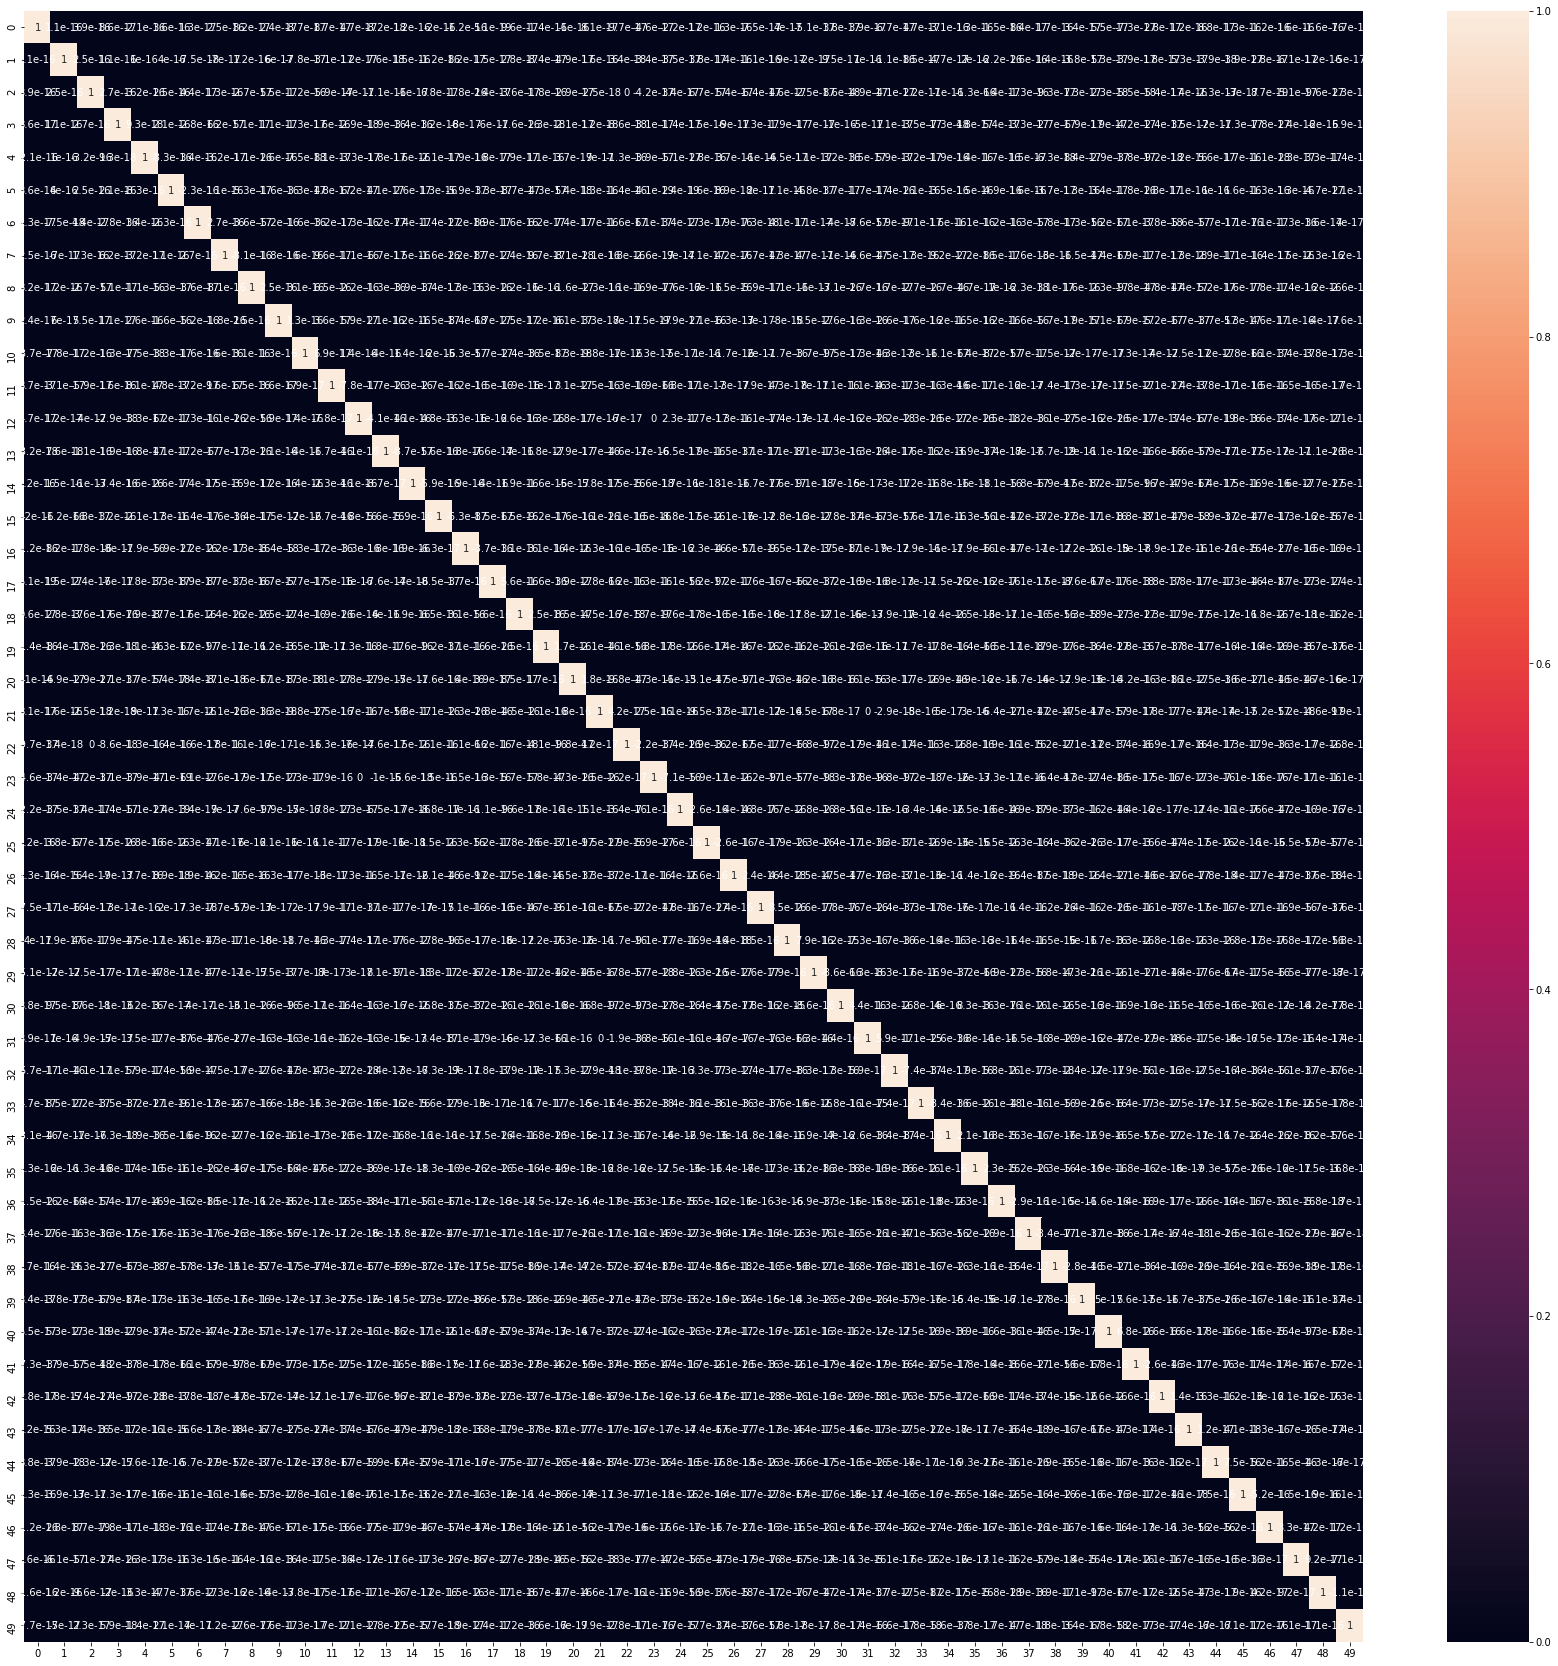

In [134]:
# Plot a correlation heat map
corrmat = np.corrcoef(X_train_pca.transpose())

plt.figure(figsize=[30,30])
sns.heatmap(corrmat, annot=True)
plt.show()

<font color='#E78A61' face='Comic Sans MS'> Now that we can see that the correlation between features has been reduced and is almost Zero in most of the cases. So lets transform test set as well</font>

In [135]:
# Apply pca to test set
X_test_pca = telecom_pca.transform(X_test)

# Check shape 
X_test_pca.shape

(8627, 50)

### <font color='#E238EC' face='Cursive'>SMOTE (Synthetic Minority Oversampling Technique) & Model Building</font>
<font color='#E78A61' face='Comic Sans MS'>Since we have imbalnced data we will be using SMOTE to oversample the minority Class. Also it has a parameter sampling_strategy which can be used to derive amount of Sampling we are expecting.</font>

<font color='Green' face='Comic Sans MS'>Also, we are trying to perform Logistic Regression which also has few hyperparameters which needs to be tuned to get the best result. So here we will be using a pipeline and Grid Serach Over that pipeline so that we can get the best parameters that can give us a good result. The pipeline is going to have following steps:</font>
<font color = 'Brown' face='Comic Sans MS'> 
 - SMOTE , To oversample the data for correct prediction
 - Logistic Regression Model Creation
</font>

<font color='Green' face='Comic Sans MS'> We will be creating Pipeline for the same</font>

In [136]:
logistic_pipe = Pipeline([('smote',SMOTE(random_state=100)), ('logReg', LogisticRegression())])

<font color='Green' face='Comic Sans MS'> Now that we have created a pipeline for the steps mentioned we will have to chose the best params that would give us the best possible prediction</font>

<font color='Brown' face='Comic Sans MS'> The parameters to deccide in the pipeline above are:</font>
<font color='Blue' face='Comic Sans MS'>
 - smote : sampling_strategy
 - logReg : l1_ratio, C
</font>

<b>l1_ratio: </b><font color='#E78A61' face='Comic Sans MS'> Setting l1_ratio=0 is equivalent to using penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'. For 0 < l1_ratio < 1 , the penalty is a combination of L1 and L2, which means using elastic net</font>
    
<b>C: </b><font color='#E78A61' face='Comic Sans MS'> Inverse of regularization strength; must be a positive float. </font>

<br>    
<font color='Green' face='Comic Sans MS'> Also since we don't want to missout on any single Churner we would be tagetting

In [137]:
# Create parameter Grid for above discussed parameters for tuning
param_grid_log = {
    'smote__sampling_strategy' : np.linspace(0.1,1,10),
    'logReg__l1_ratio' : np.linspace(0,1,5),
    'logReg__C' : np.linspace(0.001,10, 5)
}

In [65]:
# Number of folds for K-fold
n_folds = 5

# Instantiate the grid search model
grid_search_log = GridSearchCV(estimator = logistic_pipe, param_grid = param_grid_log, 
                          cv = n_folds, verbose = 1,scoring='recall')

# Fit the grid search to the data
grid_search_log.fit(X_train_pca,y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-package

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documenta

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-package

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP:

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\91967\anaconda3\lib\site-package

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Done 1250 out of 1250 | elapsed: 16.1min finished
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=100)),
                                       ('logReg', LogisticRegression())]),
             param_grid={'logReg__C': array([1.00000e-03, 2.50075e+00, 5.00050e+00, 7.50025e+00, 1.00000e+01]),
                         'logReg__l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                         'smote__sampling_strategy': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='recall', verbose=1)

In [138]:
# View Results of grid Search
cv_results = pd.DataFrame(grid_search_log.cv_results_)
cv_results

NameError: name 'grid_search_log' is not defined

In [133]:
# printing the optimal Recall score and hyperparameters
print("best recall", grid_search_log.best_score_)

# Find the best parameters
print(grid_search_log.best_estimator_)

best recall 0.8174478527607363
Pipeline(steps=[('smote', SMOTE(random_state=100, sampling_strategy=1.0)),
                ('logReg', LogisticRegression(C=0.001, l1_ratio=0.0))])


<font color='#E78A61' face='Comic Sans MS'> Create a model with Best Parameters </font>

In [139]:
# Perform SMOTE for Over Sampling
smote = SMOTE(random_state=100, sampling_strategy=1.0)
X_train_res, y_train_res = smote.fit_sample(X_train_pca,y_train)

#Check shapes
print(X_train_res.shape)
print(y_train_res.shape)

(37002, 50)
(37002,)


In [140]:
# Create a Logistic Regression model
telecom_log = LogisticRegression(C=0.001, l1_ratio=0.0)
telecom_log.fit(X_train_res,y_train_res)

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


LogisticRegression(C=0.001, l1_ratio=0.0)

In [141]:
# Check Classification metrics of train set
y_pred_res = telecom_log.predict(X_train_res)
print(classification_report(y_train_res, y_pred_res))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83     18501
           1       0.83      0.85      0.84     18501

    accuracy                           0.84     37002
   macro avg       0.84      0.84      0.84     37002
weighted avg       0.84      0.84      0.84     37002



<font color='Green' face='Comic Sans MS'> As we directly used predict the threshold probability is 0.5. But we are more inclined to get high recall with a good enough Accuracy, which is measure of how well we identified Churn Rate</font>

<font color='Green' face='Comic Sans MS'> Evaluation Metric Choosen :<font color='Blue' face='Comic Sans MS'> Recall </font><br> Reason : <font color='Blue' face='Comic Sans MS'>We want to identify People who would Churn so that the Provider would give benifits to them to make them stay. However we would also not want to make sure we don't give away benifits to all customers which might cause losses to Providers.</font>
</font><br>
    
<font color='Red' face='Comic Sans MS'> So,We will try to achieve a 90% Recall with atleat 70% Accuracy</font>

In [142]:
# Get Probabilities of Churn
y_pred_res = telecom_log.predict_proba(X_train_pca)[:,1]
# Lets try with different Thresholds
Thresholds = np.linspace(0.3,0.5,5)
for thresh in Thresholds:
    y_pred = np.where(y_pred_res>thresh,1,0)
    print("Threshold:",thresh)
    print(classification_report(y_train, y_pred))

Threshold: 0.3
              precision    recall  f1-score   support

           0       0.99      0.65      0.79     18501
           1       0.19      0.90      0.31      1627

    accuracy                           0.67     20128
   macro avg       0.59      0.78      0.55     20128
weighted avg       0.92      0.67      0.75     20128

Threshold: 0.35
              precision    recall  f1-score   support

           0       0.99      0.71      0.82     18501
           1       0.21      0.89      0.34      1627

    accuracy                           0.72     20128
   macro avg       0.60      0.80      0.58     20128
weighted avg       0.92      0.72      0.78     20128

Threshold: 0.4
              precision    recall  f1-score   support

           0       0.98      0.75      0.85     18501
           1       0.24      0.87      0.37      1627

    accuracy                           0.76     20128
   macro avg       0.61      0.81      0.61     20128
weighted avg       0.92     

<font color='Green' face='Comic Sans MS'> At threshold 0.35 we seem to be getting about 90% Recall and 72% Accuracy. Let's try for Test Set and validate if we are getting similar output</font>

### <font color='#E238EC' face='Cursive'>Model Evaluation </font>

In [143]:
# Get Probabilities of Churn  for test set
y_pred_tst = telecom_log.predict_proba(X_test_pca)[:,1]
y_pred_test = np.where(y_pred_tst>0.35,1,0)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.70      0.82      7929
           1       0.21      0.90      0.34       698

    accuracy                           0.72      8627
   macro avg       0.60      0.80      0.58      8627
weighted avg       0.92      0.72      0.78      8627



<font color='Green' face='Comic Sans MS'> At threshold 0.35 we got 90% Recall and 72% Accuracy. So we can consider our model telecom_log with threshold as 0.35 as one of the models for predicting Churn Customers</font>

<font color='#E78A61' face='Comic Sans MS'> Model Created with best Parameters has only 85% Recall when base probability 0.5. But we want to increase recall so we would do boosting to do that </font>

### <font color='#E238EC' face='Cursive'>AdaBoost</font>

<font color='#E78A61' face='Comic Sans MS'> We are trying to get the best recall. So let's go for AdaBoost tuning some of hyper parameters. They are: 
 - n_estimators
 - learning_rate
</font>

In [144]:
# parameter grid
param_grid_log_ada = {"learning_rate" : np.linspace(0.0,1,5),
              "n_estimators": range(50,200,50)
             }

In [145]:
# Create an adaboost model
telecom_log_ada = AdaBoostClassifier(base_estimator=telecom_log)

# Create a Grid Search
folds = 3
grid_search_ABC = GridSearchCV(estimator=telecom_log_ada, 
                               cv = folds,
                               param_grid=param_grid_log_ada, 
                               scoring = 'recall',                       
                               verbose = 1)

# Fit the model
grid_search_ABC.fit(X_train_res,y_train_res)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 102, in fit
    raise ValueError("learning_rate must be greater than zero")
ValueError: learning_rate must be greater than zero

  FitFailedWarning)
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_rat

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=LogisticRegression(C=0.001,
                                                                            l1_ratio=0.0)),
             param_grid={'learning_rate': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                         'n_estimators': range(50, 200, 50)},
             scoring='recall', verbose=1)

In [146]:
# FInd best Params
print(grid_search_ABC.best_estimator_)

AdaBoostClassifier(base_estimator=LogisticRegression(C=0.001, l1_ratio=0.0),
                   learning_rate=0.25)


In [144]:
# Fit model with best param
telecom_log_ada = AdaBoostClassifier(base_estimator=LogisticRegression(C=0.001, l1_ratio=0.0),
                   learning_rate=0.25)
telecom_log_ada.fit(X_train_res,y_train_res)

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\91967\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

AdaBoostClassifier(base_estimator=LogisticRegression(C=0.001, l1_ratio=0.0),
                   learning_rate=0.25)

In [145]:
# Check train Param
print(classification_report(y_train, telecom_log_ada.predict(X_train_pca)))

              precision    recall  f1-score   support

           0       0.98      0.69      0.81     18501
           1       0.19      0.84      0.31      1627

    accuracy                           0.70     20128
   macro avg       0.59      0.76      0.56     20128
weighted avg       0.92      0.70      0.77     20128



<font color='Grey' face='Comic Sans MS'>The Maximum Recall we could get using Logistic Regression using ada boost for train set is 84 and accuracy is also 70%. Let's try on test set to check</font>

### <font color='#E238EC' face='Cursive'>Model Evaluation </font>

<font color='#E78A61' face='Comic Sans MS'> We have calculated our Recall on train Set. But we always evaluate on test set as the train set data is already known to model and it is expected to do well on train set. So we consider our metrics on test set to finalize on any model</font>

In [146]:
# Check Classification metrics of test set
y_pred_test_res = telecom_log_ada.predict(X_test_pca)
print(classification_report(y_test, y_pred_test_res))

              precision    recall  f1-score   support

           0       0.98      0.68      0.80      7929
           1       0.19      0.86      0.31       698

    accuracy                           0.69      8627
   macro avg       0.59      0.77      0.56      8627
weighted avg       0.92      0.69      0.76      8627



<font color='Grey' face='Comic Sans MS'>The Maximum Recall we could get using Logistic Regression + Adaboost is 86% and accuracy is also 69%.This is not best suit. So, Let's try other model to see if we can get better model with better recall rate.</font>

### <font color='#E45E9D' face='Cursive'>2. Decision Trees</font>

<font color='Green' face='Comic Sans MS'> To implement Decision Tree there are several Steps we need to carry out few steps to get the best possible outcome. They are:</font>
<font color = 'Brown' face='Comic Sans MS'> 
 - SMOTE , To oversample the data for correct prediction
 - Decision Tree Creation
</font>
<font color='Green' face='Comic Sans MS'> We will be creating Pipeline for the same and using grid search to find best possible parameters</font>

In [147]:
# Create a pipeline to perform above mentioned steps
pipe = Pipeline([('smote',SMOTE(random_state=100)), ('dtree', DecisionTreeClassifier())], verbose = True)

<font color='Green' face='Comic Sans MS'> Now that we have created a pipeline for the steps mentioned we will have to chose the best params that would give us the best possible prediction</font>

<font color='Brown' face='Comic Sans MS'> The parameters to deccide in the pipeline above are:</font>
<font color='Blue' face='Comic Sans MS'>
 - smote : sampling_strategy
 - dtree : max_depth, min_samples_leaf, min_samples_split, criterion


<font color='Green' face='Comic Sans MS'> Also since we don't want to missout on any single Churner we would be tagetting for maximum recall score </font>

In [151]:
# Create the parameter grid 
param_grid = {
    'smote__sampling_strategy' : np.linspace(0.01,1,10),
    'dtree__max_depth': range(5, 15, 5),
    'dtree__min_samples_leaf': range(20, 100, 20),
    'dtree__min_samples_split': range(20, 100, 20),
    'dtree__criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = pipe, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,scoring='recall',n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed: 12.2min finished


[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.5s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   1.3s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=100)),
                                       ('dtree', DecisionTreeClassifier())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'dtree__criterion': ['entropy', 'gini'],
                         'dtree__max_depth': range(5, 15, 5),
                         'dtree__min_samples_leaf': range(20, 100, 20),
                         'dtree__min_samples_split': range(20, 100, 20),
                         'smote__sampling_strategy': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ])},
             scoring='recall', verbose=1)

In [152]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.046874      0.004678         0.000000        0.000000   
1         1.416610      0.028514         0.007181        0.001163   
2         1.542874      0.055369         0.007180        0.000976   
3         1.674320      0.076159         0.007979        0.001784   
4         1.875184      0.094371         0.006583        0.000489   
..             ...           ...              ...             ...   
635       2.075848      0.097916         0.008178        0.001163   
636       2.134490      0.109443         0.007780        0.000747   
637       2.228439      0.030550         0.007779        0.001163   
638       2.364276      0.025172         0.008576        0.001353   
639       2.288891      0.167727         0.004780        0.000735   

    param_dtree__criterion param_dtree__max_depth  \
0                  entropy                      5   
1                  entropy                      5   
2                  entropy                      5   
3                  entropy                      5   
4                  entropy                      5   
..                     ...                    ...   
635                   gini                     10   
636                   gini                     10   
637                   gini                     10   
638                   gini                     10   
639                   gini                     10   

    param_dtree__min_samples_leaf param_dtree__min_samples_split  \
0                              20                             20   
1                              20                             20   
2                              20                             20   
3                              20                             20   
4                              20                             20   
..                            ...                            ...   
635                            80                             80   
636                            80                             80   
637                            80                             80   
638                            80                             80   
639                            80                             80   

    param_smote__sampling_strategy  \
0                             0.01   
1                             0.12   
2                             0.23   
3                             0.34   
4                             0.45   
..                             ...   
635                           0.56   
636                           0.67   
637                           0.78   
638                           0.89   
639                              1   

                                                params  split0_test_score  \
0    {'dtree__criterion': 'entropy', 'dtree__max_de...                NaN   
1    {'dtree__criterion': 'entropy', 'dtree__max_de...           0.596923   
2    {'dtree__criterion': 'entropy', 'dtree__max_de...           0.664615   
3    {'dtree__criterion': 'entropy', 'dtree__max_de...           0.676923   
4    {'dtree__criterion': 'entropy', 'dtree__max_de...           0.670769   
..                                                 ...                ...   
635  {'dtree__criterion': 'gini', 'dtree__max_depth...           0.692308   
636  {'dtree__criterion': 'gini', 'dtree__max_depth...           0.720000   
637  {'dtree__criterion': 'gini', 'dtree__max_depth...           0.729231   
638  {'dtree__criterion': 'gini', 'dtree__max_depth...           0.707692   
639  {'dtree__criterion': 'gini', 'dtree__max_depth...           0.741538   

     split1_test_score  split2_test_score  split3_test_score  \
0                  NaN                NaN                NaN   
1             0.524540           0.533742           0.486154   
2             0.650307           0.653374           0.680000   
3             0.659509           0.684049           0.686154   
4             0.7147

In [153]:
# printing the optimal Recall score and hyperparameters
print("best recall", grid_search.best_score_)
print(grid_search.best_estimator_)

best recall 0.786729589428976
Pipeline(steps=[('smote', SMOTE(random_state=100, sampling_strategy=1.0)),
                ('dtree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=80,
                                        min_samples_split=20))],
         verbose=True)


<b><font color='#E45E9D' face='Comic Sans MS'> We have identified best possible parameters for Decision tree. Let's now create model with best parameters and evaluate the metrics</font></b>

In [148]:
#SMOTE
X_train_res , y_train_res = SMOTE(random_state=100, sampling_strategy=1.0).fit_sample(X_train,y_train)
# model with optimal hyperparameters
telecom_tree =DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=80,
                                        min_samples_split=20)
telecom_tree.fit(X_train_res, y_train_res)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=80,
                       min_samples_split=20)

In [155]:
# classification metrics for train set

y_pred_res = telecom_tree.predict(X_train_res)
print(classification_report(y_train_res, y_pred_res))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87     18501
           1       0.87      0.88      0.88     18501

    accuracy                           0.87     37002
   macro avg       0.87      0.87      0.87     37002
weighted avg       0.87      0.87      0.87     37002



<font color='#E78A61' face='Comic Sans MS'> We have got a Train set Accuracy of 87 % and train set accuracy of 88%. Lets validate the same on test data</font>

### <font color='#E238EC' face='Cursive'>Model Evaluation </font>

In [156]:
# Predict Test accuracy and recall Score
y_pred_test = telecom_tree.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      7929
           1       0.35      0.77      0.48       698

    accuracy                           0.86      8627
   macro avg       0.66      0.82      0.70      8627
weighted avg       0.93      0.86      0.89      8627



<font color='#E78A61' face='Comic Sans MS'> We have very less recall of 77%. However we have a high accuracy of 86%. So if Accuracy was our major point of concern this would have been good. But we are more concerned about recall, So this a weak model as per our requirement</font>

<font color='#768123' face='Comic Sans MS'> Lets plot the decision tree with how it has been cut down into nodes</font>

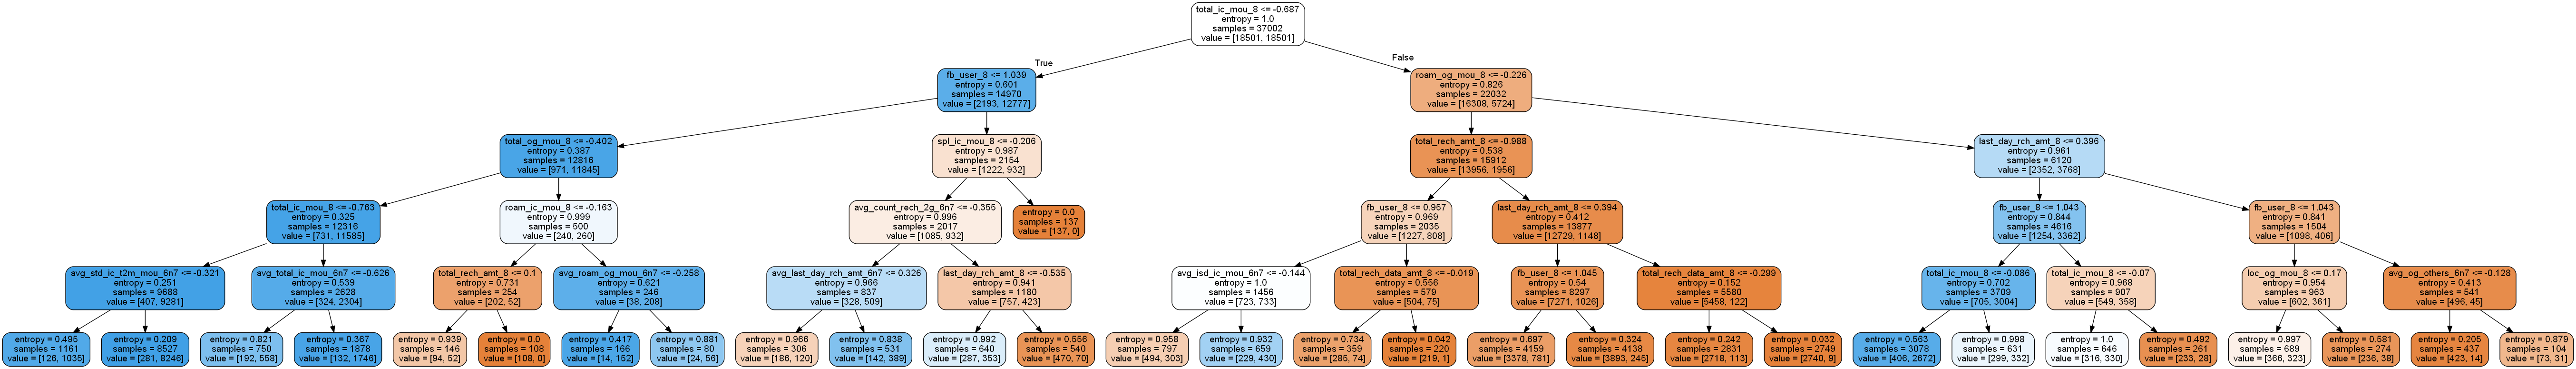

In [157]:
# Putting features
features = list(X_train_res.columns[0:])

# plotting the tree
dot_data = StringIO()  
export_graphviz(telecom_tree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

<font color = 'Red' face='Comic Sans MS'> Although we have High Acuuracy precision is just 88% in train and 77% in test. Let's try to improve that using boosting. Also we would be able to find out important features using XGBOOST</font>

<font color = 'Grey' face='Comic Sans MS'>  We are not using Adaboost here because Adaboost is best fit for Regression models, but not on Decision trees</font>

### <font color='Grey' face='Cursive'>XGBoost</font>

<font color='Brown' face='Comic Sans MS'> The important parameters we decide in XGBoost are:</font>
<font color='Blue' face='Comic Sans MS'>
 - subsample
 - learning_rate

<font color='Brown' face='Comic Sans MS'> We will try with diffrent combinations of above variables to find optimum values</font>

In [158]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.05,0.1,0.2], 
              'subsample': [0.3, 0.6, 0.9],
              'min_child_weight' : range(150,300,450)
             }          


# specify model
xgb_model = XGBClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        n_jobs=-1,
                        param_grid = param_grid, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)  

# fit the modelb
model_cv.fit(X_train_res, y_train_res)   

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.2min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [159]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      12.295450      0.103123         0.108045        0.004485   
1      21.139638      0.325583         0.121346        0.017863   
2      25.382958      0.063919         0.128656        0.012322   
3      11.016541      0.169934         0.111036        0.018324   
4      19.805045      0.294000         0.120678        0.009874   
5      24.245176      0.428426         0.122007        0.002049   
6       9.800136      0.284805         0.101064        0.005778   
7      16.372383      0.252176         0.084108        0.006219   
8      16.544088      0.496240         0.082124        0.007978   

  param_learning_rate param_min_child_weight param_subsample  \
0                0.05                    150             0.3   
1                0.05                    150             0.6   
2                0.05                    150             0.9   
3                 0.1                    150             0.3   
4                 0.1                    150             0.6   
5                 0.1                    150             0.9   
6                 0.2                    150             0.3   
7                 0.2                    150             0.6   
8                 0.2                    150             0.9   

                                              params  split0_test_score  \
0  {'learning_rate': 0.05, 'min_child_weight': 15...           0.849846   
1  {'learning_rate': 0.05, 'min_child_weight': 15...           0.873683   
2  {'learning_rate': 0.05, 'min_child_weight': 15...           0.886493   
3  {'learning_rate': 0.1, 'min_child_weight': 150...           0.863467   
4  {'learning_rate': 0.1, 'min_child_weight': 150...           0.885520   
5  {'learning_rate': 0.1, 'min_child_weight': 150...           0.889411   
6  {'learning_rate': 0.2, 'min_child_weight': 150...           0.874655   
7  {'learning_rate': 0.2, 'min_child_weight': 150...           0.888925   
8  {'learning_rate': 0.2, 'min_child_weight': 150...           0.888601   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.890222           0.889898         0.876655        0.018958   
1           0.916167           0.916977         0.902276        0.020221   
2           0.927517           0.926382         0.913464        0.019077   
3           0.907573           0.908383         0.893141        0.020985   
4           0.940165           0.941625         0.922437        0.026111   
5           0.953786           0.954111         0.932436        0.030423   
6           0.926545           0.934652         0.911951        0.026579   
7           0.962056           0.959299         0.936760        0.033843   
8           0.972110           0.971947         0.944219        0.039328   

   rank_test_score  split0_train_score  split1_train_score  \
0                9            0.886817            0.874818   
1                7            0.916248            0.905870   
2                5            0.932301            0.917302   
3                8            0.907086            0.895249   
4                4            0.942517            0.927599   
5                3            0.956705            0.938220   
6                6            0.928490            0.909194   
7                2            0.962705            0.942030   
8                1            0.972596            0.950462   

   split2_train_score  mean_train_score  std_train_score  
0            0.881790          0.881142         0.004920  
1            0.905140          0.909086         0.005073  
2            0.916086          0.921896         0.007374  
3            0.894033          0.898789         0.005888  
4            0.927355          0.932490         0.007090  
5            0.937652          0.944192         0.008851  
6            0.917383          0.918356         0.007908  
7            0.939111          0.947949         0.010502  
8            0.951516      

In [160]:
# printing the optimal Recall score and hyperparameters
print("best Recall", model_cv.best_score_)
print(model_cv.best_estimator_)

best Recall 0.9442192313928978
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=150, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)


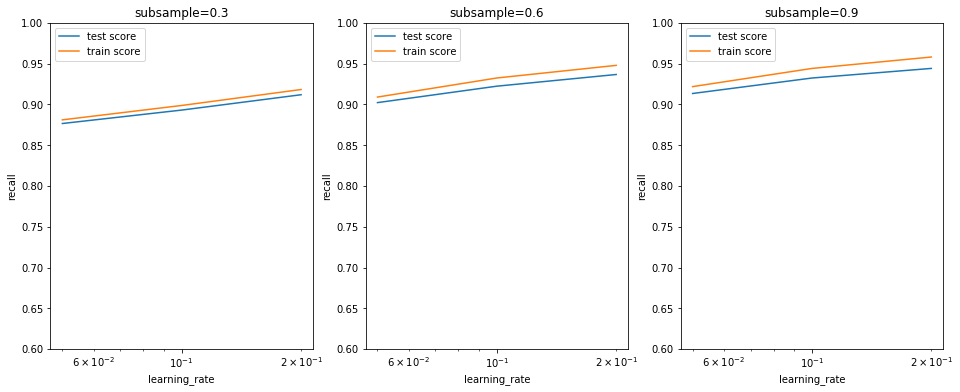

In [161]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.05,0.1, 0.2], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('recall')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

<font color='Green' face=''>The results show that a subsample size of 0.9 and learning_rate of about 0.2 seems optimal. Also, XGBoost has resulted in the highest recall (across various hyperparameters).</font>

In [162]:
# fit model on training data
telecom_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=150,  monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

telecom_xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=150, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [163]:
# predict
y_pred_res = telecom_xgb.predict(X_train_res)
print(classification_report(y_train_res, y_pred_res))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     18501
           1       0.96      0.96      0.96     18501

    accuracy                           0.96     37002
   macro avg       0.96      0.96      0.96     37002
weighted avg       0.96      0.96      0.96     37002



<font color='#E78A61' face='Comic Sans MS'> We have got a Train set Recall of 96 % and train set accuracy of 96%. Lets validate the same on test data</font>

### <font color='#E238EC' face='Cursive'>Model Evaluation </font>

In [165]:
# Check for test data
y_pred_test = telecom_xgb.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7929
           1       0.53      0.66      0.59       698

    accuracy                           0.93      8627
   macro avg       0.75      0.81      0.77      8627
weighted avg       0.93      0.93      0.93      8627



<font color='#E78A61' face='Comic Sans MS'> Even though we got very high train Recall but test recall is very less. So we will not be preferring this model for predictions. However we can come to an estimate of important features</font>

### <font color='#E238EC' face='Cursive'>Important Indicators for Predicting Churn</font>

In [166]:
# feature importance
importance = dict(zip(X_train_res.columns, telecom_xgb.feature_importances_))
weights = pd.Series(importance,
                 index=X_train_res.columns.values)
weights.sort_values(ascending=False)[:10]

loc_ic_mou_8             0.186834
total_ic_mou_8           0.121869
roam_og_mou_8            0.084863
fb_user_8                0.065543
total_rech_data_amt_8    0.024764
total_rech_amt_8         0.021669
loc_ic_t2m_mou_8         0.019905
spl_ic_mou_8             0.018989
total_og_mou_8           0.016517
avg_vbc_3g               0.014305
dtype: float64

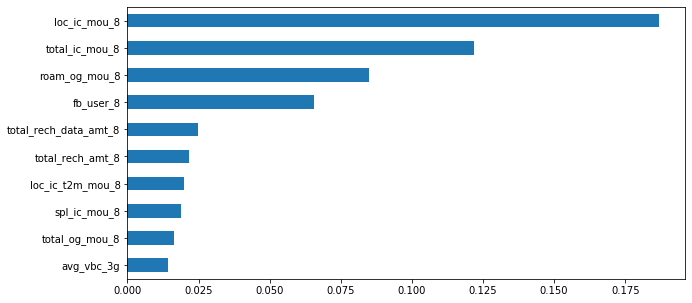

In [167]:
# plot
plt.figure(figsize=(10,5))
weights.sort_values()[-10:].plot(kind = 'barh')
plt.show()

<font color='#800517' face='Cursive'>  The Top 5 Important Predictors are:</font>
<font color='Blue' face='Comic Sans MS'>
 - loc_ic_mou_8
 - total_ic_mou_8
 - roam_og_mou_8
 - fb_user_8
 - total_rech_data_amt_8
</font>

### <font color='#E45E9D' face='Cursive'>3. Random Forest</font>

<font color='Green' face='Comic Sans MS'>Let's create a pipeline to use PCA features and use SMOTE over it for Balancing and the fit it to Random Forest</font>

In [170]:
pipeline_RF = Pipeline([('smote',SMOTE(random_state=100)), ('telecomRF', RandomForestClassifier())])

<font color='Brown' face='Comic Sans MS'> Random Forest have few important parameters. They are:</font>
<font color='Blue' face='Comic Sans MS'>
 - max_depth
 - min_samples_leaf
 - min_samples_split
 - n_estimators
 - max_features

<font color='Brown' face='Comic Sans MS'> We will try with diffrent combinations of above variables to find optimum values. To try with different operations GridSearch is of Beat use.</font>

In [174]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'telecomRF__max_depth': [4,8,10],
    'telecomRF__min_samples_leaf': [50,100, 300],
    'telecomRF__min_samples_split': [50,100,300],
    'telecomRF__n_estimators': [100,200, 300], 
    'telecomRF__max_features': [5, 10]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = pipeline_RF, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed: 25.4min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=100)),
                                       ('telecomRF',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'telecomRF__max_depth': [4, 8, 10],
                         'telecomRF__max_features': [5, 10],
                         'telecomRF__min_samples_leaf': [50, 100, 300],
                         'telecomRF__min_samples_split': [50, 100, 300],
                         'telecomRF__n_estimators': [100, 200, 300]},
             verbose=1)

In [175]:
# printing the optimal hyperparameters
print(grid_search.best_estimator_)

Pipeline(steps=[('smote', SMOTE(random_state=100)),
                ('telecomRF',
                 RandomForestClassifier(max_depth=10, max_features=5,
                                        min_samples_leaf=50,
                                        min_samples_split=100,
                                        n_estimators=200))])


In [177]:
# Over Sample Minority class using smote
smote = SMOTE(random_state=100)

X_train_smote, y_train_smote = smote.fit_sample(X_train_pca,y_train)

In [179]:
# Create RandomForest with best Params
telecom_RF = RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=200)

# Fit The trainset to best param
telecom_RF.fit(X_train_smote,y_train_smote)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=200)

In [180]:
# predict
y_pred = telecom_RF.predict(X_train_smote)
print(classification_report(y_train_smote, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     18501
           1       0.90      0.87      0.88     18501

    accuracy                           0.89     37002
   macro avg       0.89      0.89      0.89     37002
weighted avg       0.89      0.89      0.89     37002



### <font color='#E238EC' face='Cursive'>Model Evaluation </font>

In [182]:
# Check for test data
y_pred_test = telecom_RF.predict(X_test_pca)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      7929
           1       0.39      0.73      0.51       698

    accuracy                           0.88      8627
   macro avg       0.68      0.81      0.72      8627
weighted avg       0.93      0.88      0.90      8627



<font color='Blue' face='Comic Sans MS'> The Accuracy on Test set is 88% but recall is just 73 so we cannot use this for our model. </font>

## <font color='Olive' face='Cursive'> Final Observations: </font>

<font color = 'Magenta' face='Comic Sans MS'> After having done model Building using various techniques namely Logistic Regression, Logistic Regression with Boosting, Decision Trees and Random Forests we came to following conclusions:</font>
<font color='Brown' face='Comic Sans MS'>
 - We have used PCA to arrive at final features and also considered the Regularization terms while creating logistic Regression model, so we are least concerned about significance of variables as that will be taken care by regularization.
 - Random Forests , Decision Trees , Logistic Regression with Boosting can be used to get best overall accuracy. Achieving this accuracy using normal logistic Regression is a very tideous task. And Random Forest gives the best Accuracy.
 - However as we want the best Recall score with considerable accuracy, we can say the logistic model built "telecom_log" with threshold as 0.35 is the best model.
</font>
<br>

####  <font color='Green' face='Comic Sans MS'> So In this Particular Case we suggest to use logistic model "telecom_log" with threshold as 0.35 to best predict the Churners</font>
 

## <font color='#4863A0' face='Cursive'> Top Indicators Of Churn: </font>

<font color = 'Magenta' face='Comic Sans MS'> 
We Found out the important Indicators that might effect while performing modelling and they are:</font>
<font color='Brown' face = 'Comic Sans MS'>
 - Incoming Minutes of Usage
 - Usage of FaceBook
 - Total Data Recharge
 - Total Normal Recharge
 - Outgoing Minutes of Usage
</font>

## <font color='#666362' face='Cursive'> Suggestions: </font>